# Combine all df_points to one df
old :2018-2021: 2.547.157 rows

final: 18-21: 2.375.902 rows

In [2]:
import pandas as pd

In [3]:
dfa = pd.read_csv('../data/df_points/df_points_2018.csv')
dfb = pd.read_csv('../data/df_points/df_points_2019.csv')
dfc = pd.read_csv('../data/df_points/df_points_2020_v2.csv')
dfd = pd.read_csv('../data/df_points/df_points_2021.csv')

In [4]:
combined = pd.concat([dfa, dfb, dfc, dfd], ignore_index=True)

In [5]:
combined.tail()

,bike_id,start_time,end_time,start_lat,start_lng,end_lat,end_lng,end_station_number
2043433,100190,1636467044,1636637754,51.325443,12.308089,51.325443,12.308089,41004.0
2043434,100190,1636652112,1636656874,51.325443,12.308089,0.000000,0.000000,NaN
2043435,93419,1609630403,1609630876,51.324672,12.311404,51.346662,12.372344,NaN
2043436,41646,1629569945,1629572024,51.340655,12.353256,51.327840,12.325948,NaN
2043437,41646,1626353327,1626360404,51.324035,12.336220,51.361449,12.369214,NaN


In [6]:
c = combined.sort_values(by=['dt_start'])

In [7]:
c.to_csv('../data/final_df_points_18_21.csv', index=False)

# analyse nosplit ds

In [ ]:
dfbox = pd.DataFrame(c['idle_time'])
dfbox.boxplot()

In [ ]:
dfbox.quantile([0.25,0.5,0.75,1])

In [9]:
def f(row):
    if row['idle_time'] < 42:
        val = 1
    elif row['idle_time'] < 132:
        val = 2
    elif row['idle_time'] < 476:
        val = 3
    else:
        val = 4
    return val

c['idle_time_class'] = c.apply(f, axis=1)

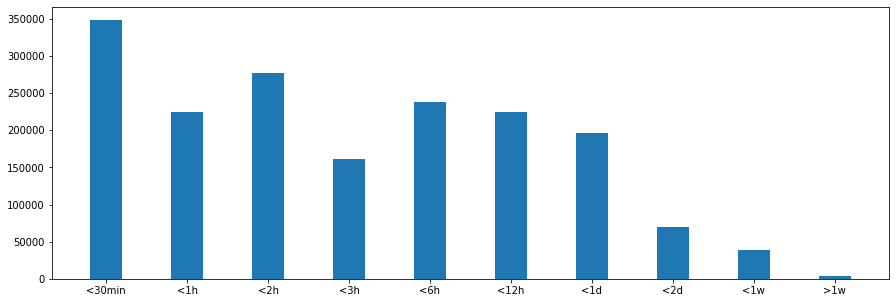

In [10]:
times = ['<30min', '<1h', '<2h', '<3h', '<6h', '<12h', '<1d', '<2d', '<1w', '>1w']
numbers = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for ind in c.index:
    idle = c['idle_time'][ind]
    if (idle < 30):
        numbers[0] += 1
        continue
    elif (idle < 60):
        numbers[1] += 1
        continue
    elif (idle < 120):
        numbers[2] += 1
        continue
    elif (idle < 180):
        numbers[3] += 1
        continue
    elif (idle < 360):
        numbers[4] += 1
        continue
    elif (idle < 720):
        numbers[5] += 1
        continue
    elif (idle < 1440):
        numbers[6] += 1
        continue
    elif (idle < 2880):
        numbers[7] += 1
        continue
    elif (idle < 10080):
        numbers[8] += 1
        continue
    else:
        numbers[9] += 1
        continue

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.bar(times, numbers, width=0.4)

plt.show()